## Summing Algorithms

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time


def sum_of_floats(arr, steps=False):
    acc = np.float32(0.0)

    if steps:
        arr_steps = []

        for i in range(len(arr)):
            if i % 25000 == 0 and i > 0:
                exact = np.float32(i) * arr[i]
                arr_steps.append(abs((acc - exact)/exact))
            acc += arr[i]

        return arr_steps
    else:
        for i in range(len(arr)):
            acc += arr[i]

        return acc


def sum_recursive(arr):
    return sum_rec(arr, 0, len(arr)-1)


def sum_rec(arr, i, j):
    if i == j:
        return arr[i]
    elif j-i == 1:
        return arr[i] + arr[j]

    return sum_rec(arr, i, (i+j)//2 - 1) + sum_rec(arr, (i+j)//2, j)


def kahan_sum(arr):
    result = np.float32(0.0)
    error = np.float32(0.0)

    for i in arr:
        y = np.float32(i) - error
        tmp = result + y
        error = (tmp - result) - y
        result = tmp

    return result


def get_result(algorithm, arr, exact_sum, steps=False):
    start_time = time()

    if steps:
        return algorithm(arr, steps=True)
    else:
        result = algorithm(arr)

    absolute_error = abs(result - exact_sum)
    relative_error = abs((result - exact_sum) / exact_sum)

    print("one element: ", arr[0])
    print("result: ", result)
    print("accurate result: ", exact_sum)
    print("absolute error ", absolute_error)
    print("relative error ", relative_error)
    print("time: ", time() - start_time, "\n")

iterative: 
one element:  0.53125
result:  5030840.5
accurate result:  5312500.0
absolute error  281659.5
relative error  0.053018257
time:  1.4997780323028564 

recursive: 
one element:  0.53125
result:  5312500.0
accurate result:  5312500.0
absolute error  0.0
relative error  0.0
time:  3.4552273750305176 

Kahan algorithm: 
one element:  0.53125
result:  5312500.0
accurate result:  5312500.0
absolute error  0.0
relative error  0.0
time:  8.655736684799194 



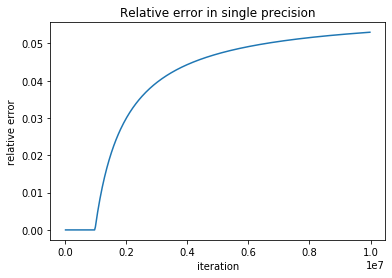

In [2]:
size = 10 ** 7
# number = np.float32(0.236589)
number = np.float32(0.53125)
exact_sum = np.float32(size * number)

arr = []
for i in range(size):
    arr.append(number)

x_axis = []
for i in range(1, size // 25000):
    x_axis.append(i * 25000)

print("iterative: ")
get_result(sum_of_floats, arr, exact_sum)

print("recursive: ")
get_result(sum_recursive, arr, exact_sum)

print("Kahan algorithm: ")
get_result(kahan_sum, arr, exact_sum)

arr_steps = get_result(sum_of_floats, arr, exact_sum, steps=True)

plt.plot(x_axis, arr_steps)
plt.title("Relative error in single precision")
plt.xlabel("iteration")
plt.ylabel("relative error")
plt.show()


## Partial Sums

In [3]:
def riemann_zeta(s, n, float_func, reverse=False):
    result = float_func(0)

    if not reverse:
        for k in range(1, n+1):
            result += float_func(1 / (k ** s))
    else:
        for k in range(n, 0, -1):
            result += float_func(1 / (k ** s))

    return result


def dirichlet_eta(s, n, float_func, reverse=False):
    result = float_func(0)

    if not reverse:
        sign = 1
        for k in range(1, n+1):
            result += float_func(sign / (k ** s))
            sign *= -1
    else:
        sign = -1 if n % 2 == 0 else 1
        for k in range(n, 0, -1):
            result += float_func(sign / (k ** s))
            sign *= -1

    return result


def print_result(list_s, list_n, float_func, is_reversed):
    print("sum forwards ", end='') if not is_reversed else print("sum backwards ", end='')
    print("with single precision") if float_func == np.float32 else print("with double precision")

    for s in list_s:
        for n in list_n:
            zeta = riemann_zeta(s, n, float_func, is_reversed)
            eta = dirichlet_eta(s, n, float_func, is_reversed)
            print("s: ", s, "  n: ", n, "  zeta: ", zeta, "  eta: ", eta)

    print("\n")

In [4]:
list_s = [2, 3.6667, 5, 7.2, 10]
list_n = [50, 100, 200, 500, 1000]

print_result(map(np.float32, list_s), list_n, np.float32, is_reversed=False)
print_result(map(np.float32, list_s), list_n, np.float32, is_reversed=True)
print_result(map(np.float64, list_s), list_n, np.float64, is_reversed=False)
print_result(map(np.float64, list_s), list_n, np.float64, is_reversed=True)


sum forwards with single precision
s:  2.0   n:  50   zeta:  1.6251329   eta:  0.822271
s:  2.0   n:  100   zeta:  1.634984   eta:  0.8224175
s:  2.0   n:  200   zeta:  1.6399467   eta:  0.8224547
s:  2.0   n:  500   zeta:  1.642936   eta:  0.82246536
s:  2.0   n:  1000   zeta:  1.6439348   eta:  0.82246685
s:  3.6667   n:  50   zeta:  1.1093994   eta:  0.9346931
s:  3.6667   n:  100   zeta:  1.1094086   eta:  0.9346933
s:  3.6667   n:  200   zeta:  1.1094086   eta:  0.9346933
s:  3.6667   n:  500   zeta:  1.1094086   eta:  0.9346933
s:  3.6667   n:  1000   zeta:  1.1094086   eta:  0.9346933
s:  5.0   n:  50   zeta:  1.0369275   eta:  0.9721198
s:  5.0   n:  100   zeta:  1.0369275   eta:  0.9721198
s:  5.0   n:  200   zeta:  1.0369275   eta:  0.9721198
s:  5.0   n:  500   zeta:  1.0369275   eta:  0.9721198
s:  5.0   n:  1000   zeta:  1.0369275   eta:  0.9721198
s:  7.2   n:  50   zeta:  1.0072277   eta:  0.99352705
s:  7.2   n:  100   zeta:  1.0072277   eta:  0.99352705
s:  7.2   n:  2

## Logistic Map

In [7]:
def logistic(r, x):
    return r * x * (1-x)


def draw_logistic_map(n, r_range, iterations, iterations_to_draw, x):
    r = np.linspace(r_range[0], r_range[1], n)

    fig, ax = plt.subplots(1, 1)

    for i in range(iterations):
        x = logistic(r, x)
        if i >= (iterations - iterations_to_draw):
            ax.plot(r, x, ',k', alpha=.25)

    ax.set_xlim(r_range[0], r_range[1])
    ax.set_title("Bifurcation diagram")
    plt.xlabel("r")
    plt.ylabel("Xn")
    plt.savefig('bifurcation_diagram.png', dpi=800)


def get_results(x, r, n, float_func):
    x = float_func(x)
    r = float_func(r)
    x_axis = [float_func(i) for i in range(n + 1)]
    y_axis = []

    for i in range(n + 1):
        x = float_func(logistic(r, x))
        y_axis.append(x)

    return x_axis, y_axis


def draw_trajectories(x, r, n):
    fig, ax = plt.subplots(1, 1)

    x_axis, y_axis = get_results(x, r, n, np.float32)
    plt.plot(x_axis, y_axis, c="green")

    x_axis, y_axis = get_results(x, r, n, np.float64)
    plt.plot(x_axis, y_axis, c="red")

    ax.set_xlim(0, n)
    ax.set_title("trajectories")
    plt.xlabel("n")
    plt.ylabel("Xn")
    plt.savefig('trajectories.png', dpi=800)


def iterations_to_zero(x):
    r = np.float32(4.0)
    fl_x = np.float32(x)

    it = 0
    while fl_x != 0:
        it += 1
        fl_x = np.float32(logistic(r, fl_x))

    print(x, ": ", it, "  ", end='')

    if it < 1000:
        print(" ", end='')
    if it < 100:
        print(" ", end='')
    if it < 10:
        print(" ", end='')


def print_iterations_to_zero():
    for x in range(1, 100):
        if x not in [9, 10, 20, 25, 27, 36, 47, 53, 64, 73, 75, 80, 97]:
            iterations_to_zero(x/100)
        else:
            print("               ", end='')
        if x % 10 == 0:
            print()

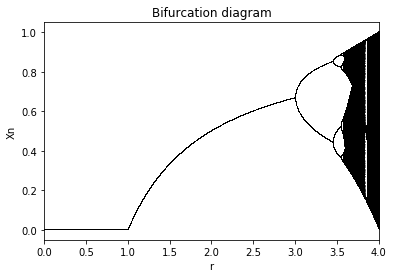

In [12]:
draw_logistic_map(10000, (0, 4), 10000, 1000, 0.00001)

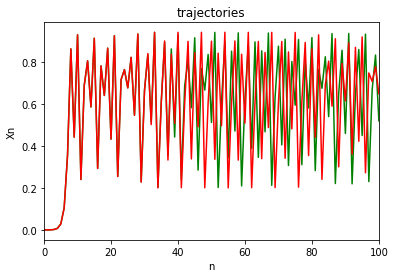

In [10]:
draw_trajectories(0.00001, 3.775, 100)

In [11]:
print_iterations_to_zero()

0.01 :  2960   0.02 :  984    0.03 :  832    0.04 :  269    0.05 :  3543   0.06 :  3416   0.07 :  1323   0.08 :  885                                  
0.11 :  559    0.12 :  620    0.13 :  3094   0.14 :  1954   0.15 :  3253   0.16 :  3009   0.17 :  1102   0.18 :  737    0.19 :  3542                  
0.21 :  3484   0.22 :  3550   0.23 :  113    0.24 :  2647                  0.26 :  1900                  0.28 :  2986   0.29 :  2361   0.3 :  1100   
0.31 :  2406   0.32 :  2146   0.33 :  2538   0.34 :  2016   0.35 :  1095                  0.37 :  638    0.38 :  3200   0.39 :  3458   0.4 :  2406   
0.41 :  1377   0.42 :  767    0.43 :  2494   0.44 :  333    0.45 :  804    0.46 :  2629                  0.48 :  763    0.49 :  3252   0.5 :  2      
0.51 :  3252   0.52 :  1349                  0.54 :  2629   0.55 :  804    0.56 :  333    0.57 :  2494   0.58 :  767    0.59 :  3856   0.6 :  2406   
0.61 :  3458   0.62 :  3200   0.63 :  638                   0.65 :  862    0.66 :  2016   0.67 :  